<br />

<div>
<font size="6">２０１７年度オープンキャンパス　人間情報工学コース　橋本研究室</font>
<br>
<br>
<font size="6">Graphillion Demo</font>

</div>
<br />
<div style="text-align: right;">
<font size="4"></font>
</div>

<br />

# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Graphillionとは" data-toc-modified-id="Graphillionとは-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Graphillionとは</a></div><div class="lev1 toc-item"><a href="#おねえさんの問題" data-toc-modified-id="おねえさんの問題-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>おねえさんの問題</a></div><div class="lev2 toc-item"><a href="#簡単な例　2-times-2格子グラフの場合" data-toc-modified-id="簡単な例　2-times-2格子グラフの場合-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>簡単な例　$2 \times 2$格子グラフの場合</a></div><div class="lev1 toc-item"><a href="#Graphillionによるおねえさんの問題の解の導出" data-toc-modified-id="Graphillionによるおねえさんの問題の解の導出-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Graphillionによるおねえさんの問題の解の導出</a></div><div class="lev2 toc-item"><a href="#準備" data-toc-modified-id="準備-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>準備</a></div><div class="lev2 toc-item"><a href="#数え上げの実行" data-toc-modified-id="数え上げの実行-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>数え上げの実行</a></div><div class="lev2 toc-item"><a href="#辺重みの昇順・降順列挙" data-toc-modified-id="辺重みの昇順・降順列挙-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>辺重みの昇順・降順列挙</a></div><div class="lev3 toc-item"><a href="#昇順列挙" data-toc-modified-id="昇順列挙-331"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>昇順列挙</a></div><div class="lev3 toc-item"><a href="#降順列挙" data-toc-modified-id="降順列挙-332"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>降順列挙</a></div>

# Graphillionとは

グラフ構造に対して高速に集合演算を行ったり，ある条件を満たす部分グラフを列挙することができるライブラリ．  
プログラミング言語のPythonから利用できる．

# おねえさんの問題

##### **縦と横の辺の数が$n$の格子グラフの対角２頂点をつなぐ経路はいくつ存在するか．ただし同じところを２度通ってはいけない．**  

問題の名前の由来にもなった動画がYouTubeで公開されている．

* [『フカシギの数え方』 おねえさんといっしょ！ みんなで数えてみよう！](https://www.youtube.com/watch?v=Q4gTV4r0zRs)

* [Graphillion: 数え上げおねえさんを救え / Don't count naively](https://www.youtube.com/watch?v=R3Hp9k876Kk)



## 簡単な例　$2 \times 2$格子グラフの場合

経路は１２通り存在する．

<img src="images/grid2_2_with_labels.png" align="left" alt="" title="" width="" height="" />
<img src="images/2_2_all_results.png" align="left" alt="" title="" width="" height="" />
<br clear="all">

<br>

$n \times n$の格子グラフの解の個数は以下の通り．  
$11 \times 11$の規模では，すべての経路を数え上げるのにスーパーコンピュータを用いても**２９０億年**かかってしまうといわれている．

|n|経路の数|
|:---:|----:|
|1|2|
|2|12|
|3|184|
|4|8512|
|5|1262816|
|6|575780564|
|7|789360053252|
|8|3266598486981642|
|9|41044208702632496804|
|10|1568758030464750013214100|
|11|182413291514248049241470885236|
|12|64528039343270018963357185158482118|
|13|69450664761521361664274701548907358996488|
|14|227449714676812739631826459327989863387613323440|

# Graphillionによるおねえさんの問題の解の導出

Graphillionを用いて，おねえさんの問題を解いてみる．

## 準備

格子グラフの規模の設定やGraphillionの実行に必要な前処理を行う．

必要なライブラリのインポート

In [3]:
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspace
from graphillion import GraphSet

from lib.gridgraph import GridGraph
from lib.utils import *

%matplotlib inline

mpl.rcParams['font.family'] = 'Source Han Code JP'

格子グラフの規模とスタート・ゴールの設定

In [1]:
m, n = 5, 5 # 格子グラフの規模　m×nの格子グラフを表す
s, t = 1, (m+1)*(n+1) # スタート，ゴール

格子グラフをGraphillionに読み込ませる．

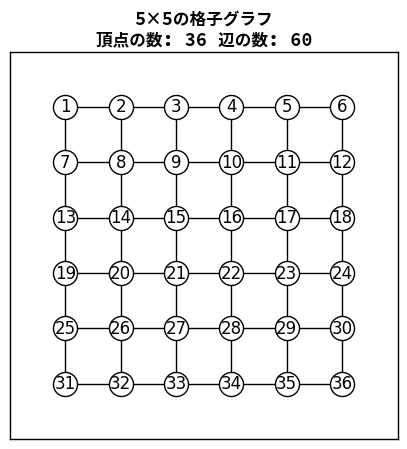

In [4]:
G = GridGraph(m, n)
GraphSet.set_universe(G.nx_graph.edges(), traversal='as-is')
# GraphSet.set_universe(G.nx_graph.edges(), traversal='bfs')
plt.figure(figsize=(m, n))
plt.title("{}×{}の格子グラフ\n頂点の数: {} 辺の数: {}".format(m, n, len(G.nx_graph.nodes()), len(G.nx_graph.edges())))
G.draw()
metric_table = create_metric_table(G.nx_graph)
edge_labels = create_metric_table(G.nx_graph, bidirectional=True)

## 数え上げの実行

対角２頂点間のすべてのパスを求める．  
**必要な命令文は`GraphSet.paths(s, t)`のみ．**

In [5]:
paths = GraphSet.paths(s, t)
print("パスの本数: ", end='')
if m > 7 and n > 7:
    print(paths.len())
else:
    print(len(paths))

パスの本数: 1262816


経路を１０本描画する．

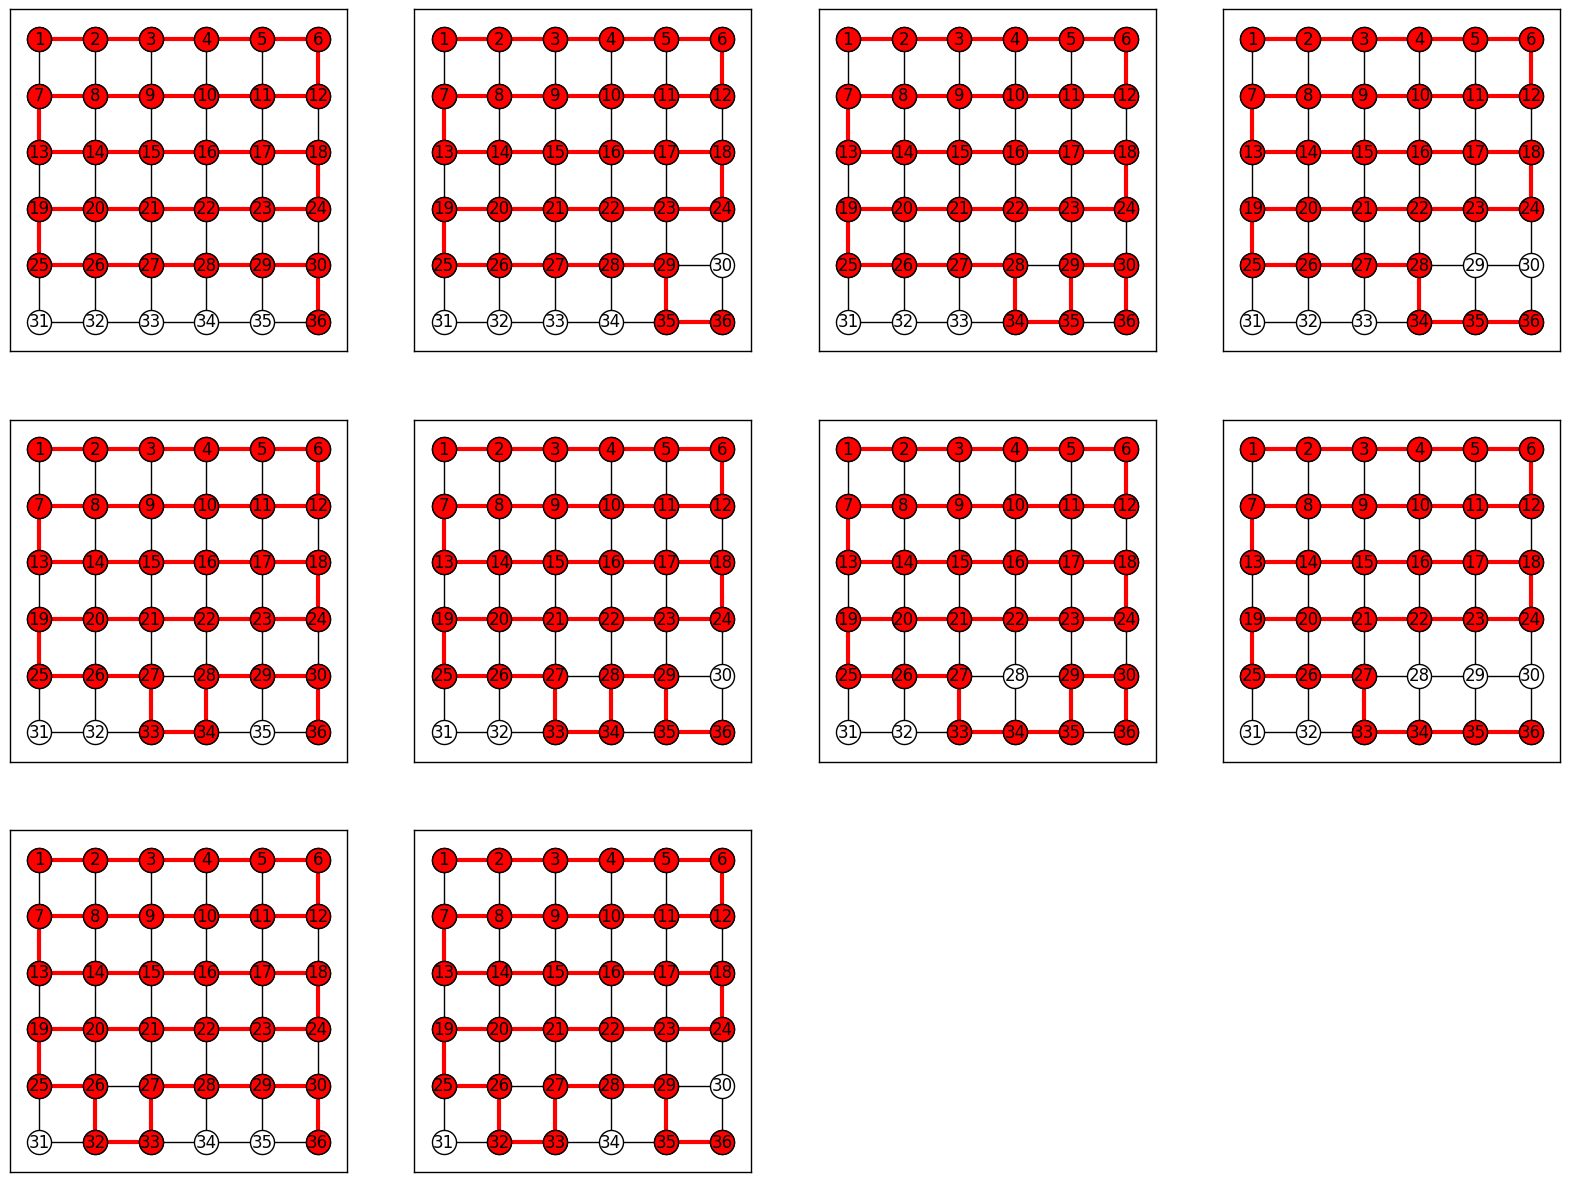

In [6]:
plt.figure(figsize=(m+15, n+10))
for i,path in enumerate(paths):
    plt.subplot(3, 4, 1+i)
    G.draw(subgraph=path)
    plt.xticks([])
    plt.yticks([])
    if i == 9: break

## 辺重みの昇順・降順列挙

電車やバスのような交通網をグラフ構造として考えるとき，ある駅から別の駅へ移動するときの運賃は頂点間を結ぶ辺に付与された重み（コスト）として表すことができる．  
このようなグラフを辺重み付きグラフという．Graphillionは列挙した結果を辺重みの和の昇順・降順で取り出すことができる．  
格子グラフの各辺に1から100までの整数をランダムに辺重みとして付与して，昇順・降順で列挙する．

### 昇順列挙

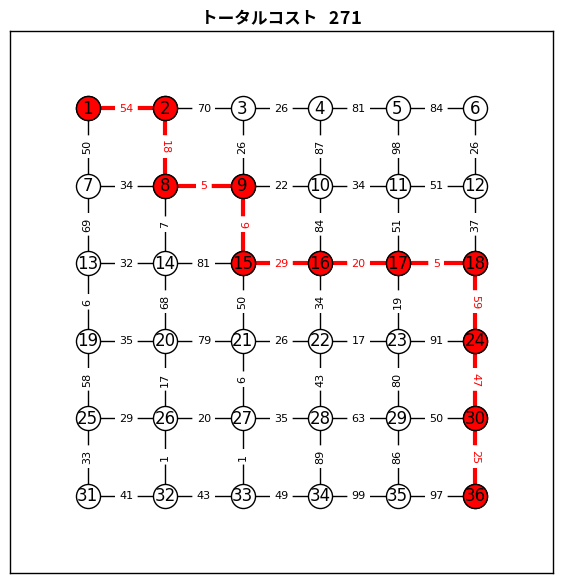

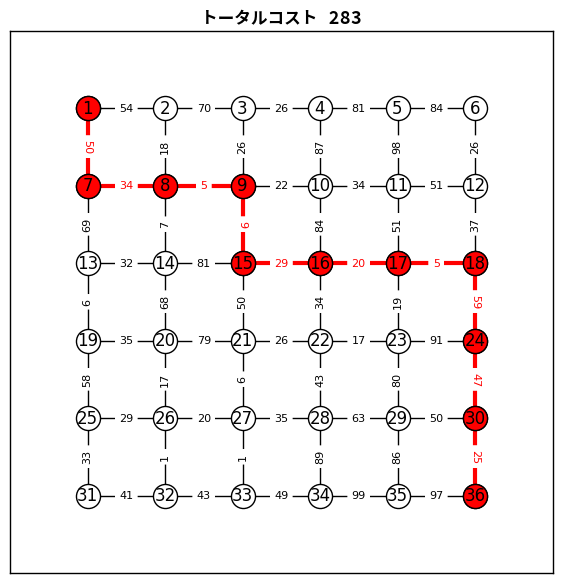

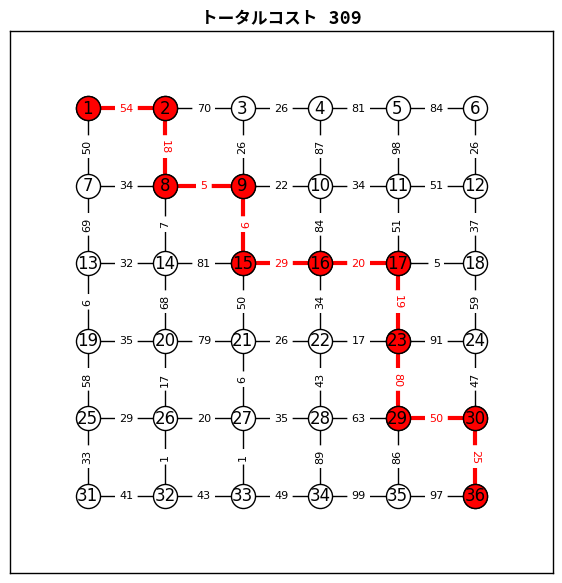

In [7]:
for i,path in enumerate(paths.min_iter(metric_table)):
    plt.figure(figsize=(m+2, n+2))
    plt.title("トータルコスト {}".format(total_weight(path, metric_table)))
    G.draw(subgraph=path, edge_labels=edge_labels)
    plt.show()
    if i == 2: break

### 降順列挙

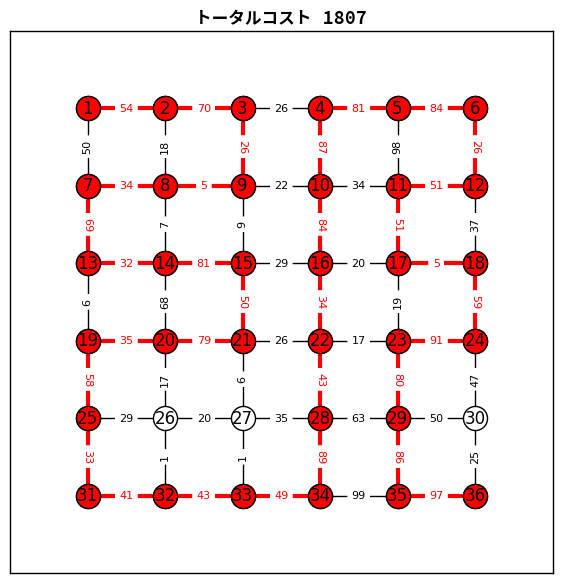

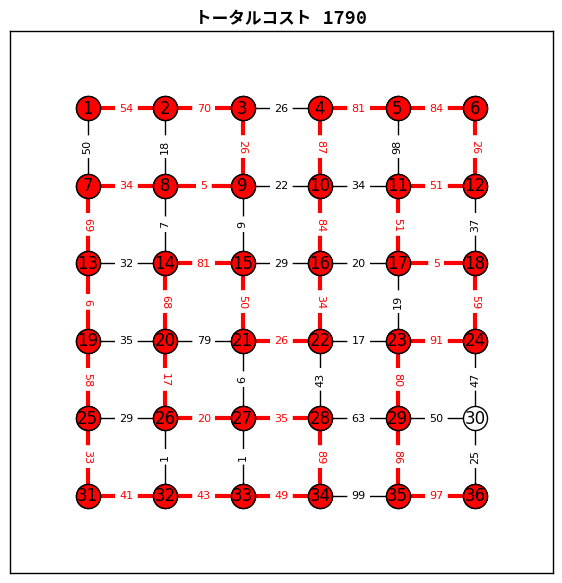

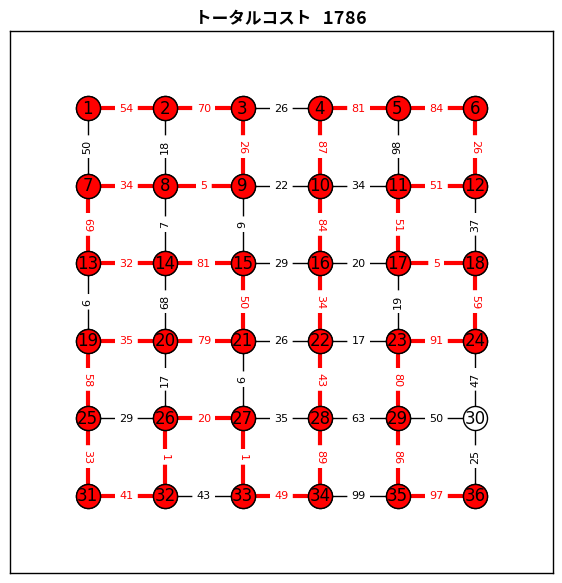

In [8]:
for i,path in enumerate(paths.max_iter(metric_table)):
    plt.figure(figsize=(m+2, n+2))
    plt.title("トータルコスト {}".format(total_weight(path, metric_table)))
    G.draw(subgraph=path, edge_labels=edge_labels)
    plt.show()
    if i == 2: break